## Ques: 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


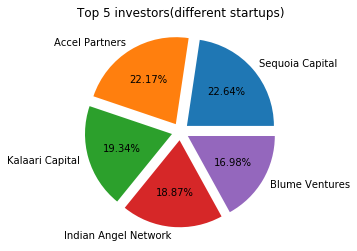

In [2]:
# problem 3:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("Datasets/startup_funding.csv",encoding="utf-8")
df=data.copy()

# getting rid of undisclosed investors
df=df[df.InvestorsName!="Undisclosed Investors"]
df=df[df.InvestorsName!="Undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed Investor"]
df=df[df.InvestorsName!="Undisclosed investor"]
df=df[df.InvestorsName!="undisclosed investors"]
df=df[df.InvestorsName!="Undisclosed"]
df.dropna(subset=["InvestorsName"],inplace=True)
def func1(name):
    return name.split(",")
df.InvestorsName=df.InvestorsName.apply(func1) # considering all investors for a particular startup

# correction of spelling in StartupNames column
df.StartupName.replace("Ola Cabs","Ola",inplace=True)
df.StartupName.replace("Olacabs","Ola",inplace=True)
df.StartupName.replace("olacabs","Ola",inplace=True)
df.StartupName.replace("ola","Ola",inplace=True)
df.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
df.StartupName.replace("Oyorooms","Oyo",inplace=True)
df.StartupName.replace("OYO Rooms","Oyo",inplace=True)
df.StartupName.replace("OyoRooms","Oyo",inplace=True)
df.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
df.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)

inv=np.array(df.InvestorsName)
stname=np.array(df.StartupName)
check={}
i_a={}

for i in range(len(inv)):
    for j in range(len(inv[i])):
        element=inv[i][j].strip()
        if element!="":
            if not((stname[i]+element) in check.keys()):
                i_a[element]=i_a.get(element,0)+1
                check[stname[i]+element]=1
                
d=pd.DataFrame(list(i_a.values()),list(i_a.keys()))
d=d.sort_values(by=[0],ascending=False)
for i in range(5):
    print(d.index[i],d[0][i])

# plotting of graph

count=np.array(d.values[0:5]).ravel()
inv_names=np.array(d.index[0:5]).ravel()
e=[0.1,0.1,0.1,0.1,0.1]
plt.pie(count,labels=inv_names,autopct="%.2f%%",explode=e)
plt.title("Top 5 investors(different startups)")
plt.show()